### ***Loading the audio file***

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import librosa
audio_path = '/content/drive/MyDrive/Colab Notebooks/03-01-01-01-01-02-10.wav'
x, sr = librosa.load(audio_path)

### ***Creating an audio signal***

In [3]:
import numpy as np
sr = 22050     # sample rate
T = 5.0      # seconds
t = np.linspace(0, T, int(T*sr), endpoint = False)
x = 0.5 * np.sin(2*np.pi*220*t)



In [4]:
import IPython.display as ipd
ipd.Audio(x, rate=sr)

In [7]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

## ***Feature Extraction***

In [8]:
x, sr = librosa.load(audio_path)
ipd.Audio(x, rate=sr)

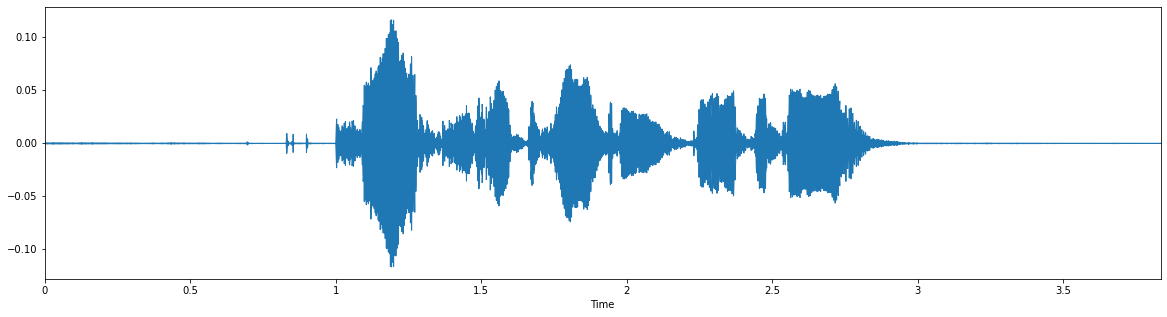

In [9]:
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

### ***Zero-Crossing Rate***
 *- It is basically the rate at which a signal changes from positive to zero to negative or from negative to zero to positive.*

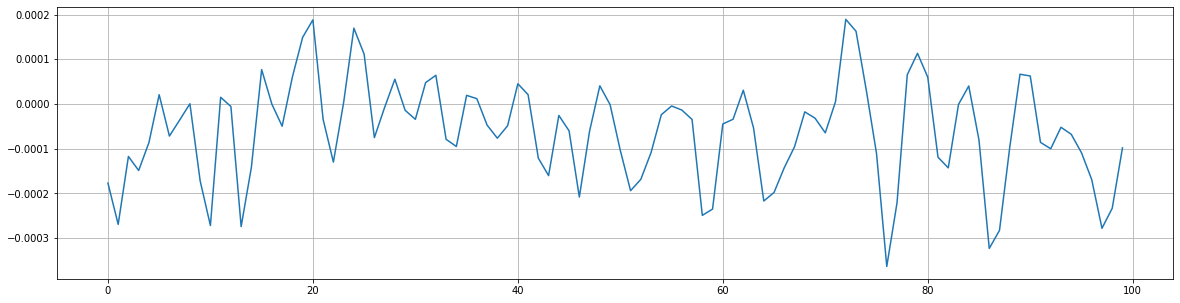

In [10]:
# Zooming in

n0 = 9000
n1 = 9100
plt.figure(figsize=(20,5))
plt.plot(x[n0:n1])
plt.grid()

In [12]:
# Counting the zero-crossings

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [13]:
print(sum(zero_crossings))

32


In [21]:
# Counting zero crossings for the entire signal

print(sum(librosa.zero_crossings(x, pad=False)))
librosa.zero_crossings(x, pad=False).shape

14670


(84610,)

### ***Spectral Centroid***
*- It is basically the center of 'gravity' of the spectrum. It is a measure used in digital signal processing to characterise a spectrum. It indicates where the center of mass of the spectrum is located.*

*Perceptually, it has a robust connection with the impression of 'brightness of a sound'.*

In [14]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(166,)

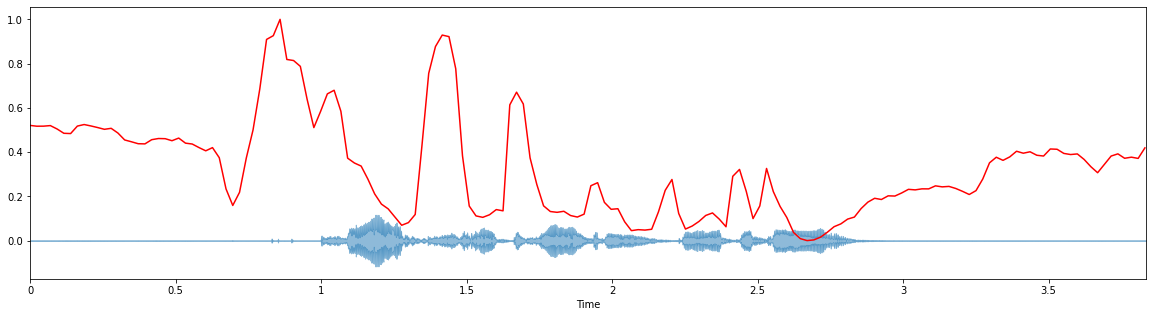

In [17]:
# Computing the time variable for visualization

plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualization

def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plotting the spectral centroid along with the waveform

librosa.display.waveplot(x, sr=sr, alpha=0.5)
plt.plot(t, normalize(spectral_centroids), color='r')

### ***Spectral Rolloff***
*- Rolloff frequency is the frequency below which a specified percentage of the total spectral energy lies.*

*librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal.*

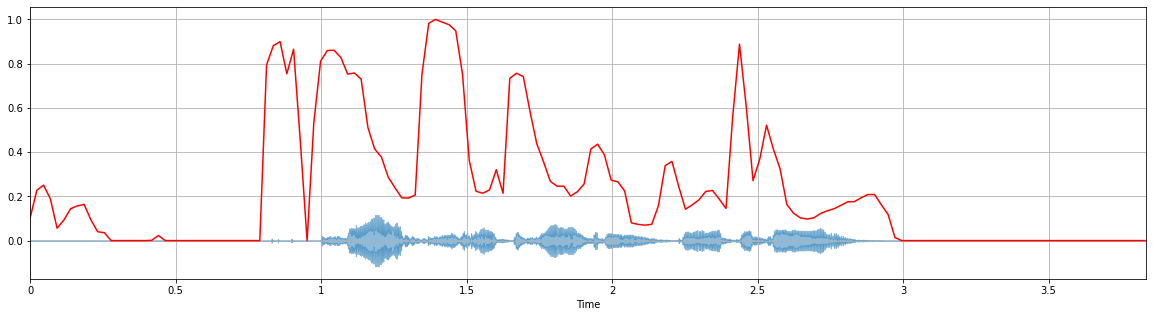

In [18]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]

librosa.display.waveplot(x, sr=sr, alpha=0.5)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

### ***Spectral Bandwidth***
*- librosa.feature.spectral_bandwidth computes the order- p spectral bandwidth:*

$(\sum_{k} S(k) (f(k) - f_c)^p )^\frac{1}{p}$
 
*where  S(k)  is the spectral magnitude at frequency bin  k ,*  
*f(k)  is the frequency at bin  k , and  $f_c$  is the spectral centroid.* 

*When  p=2 , this is like a weighted standard deviation.*

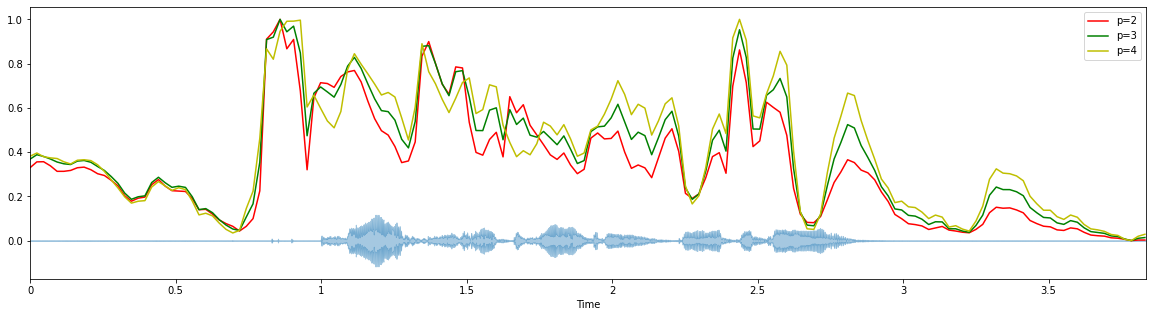

In [23]:
plt.figure(figsize=(20,5))

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p=2', 'p=3', 'p=4'))

### ***Spectral Contrast***
*- Spectral contrast considers the spectral peak, the spectral valley, and their difference in each frequency subband. For more information, click [here](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.583.7201&rep=rep1&type=pdf)*

*librosa.feature.spectral_contrast computes the spectral contrast for six subbands for each time frame:*

In [24]:
spectral_contrast = librosa.feature.spectral_contrast(x, sr=sr)
spectral_contrast.shape

(7, 166)

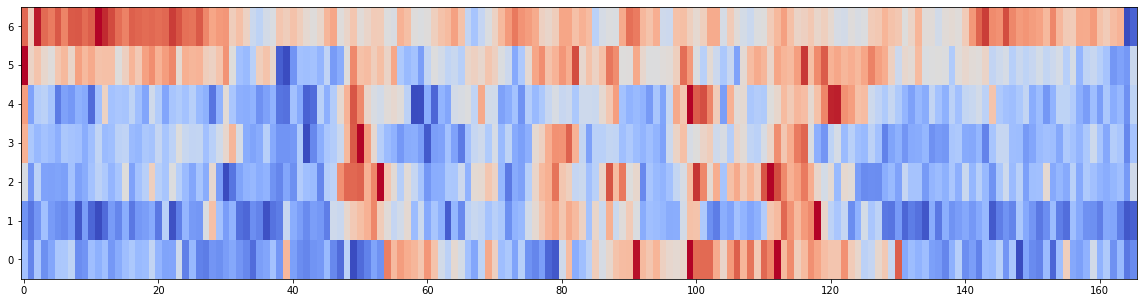

In [26]:
plt.figure(figsize=(20,5))
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')

### ***MFCC (Mel-Frequency Cepstral Coefficients)***
*- In sound processing, it is a representation of the short term power spectrum of a sound based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency.*

*It provides us enough frequency channels to analyze the audio.*

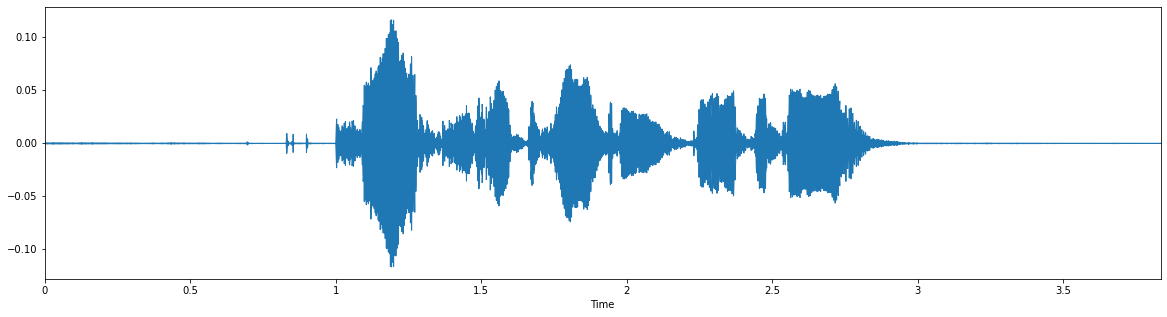

In [27]:
plt.figure(figsize=(20,5))
x, sr = librosa.load(audio_path)
librosa.display.waveplot(x, sr=sr)

(20, 166)


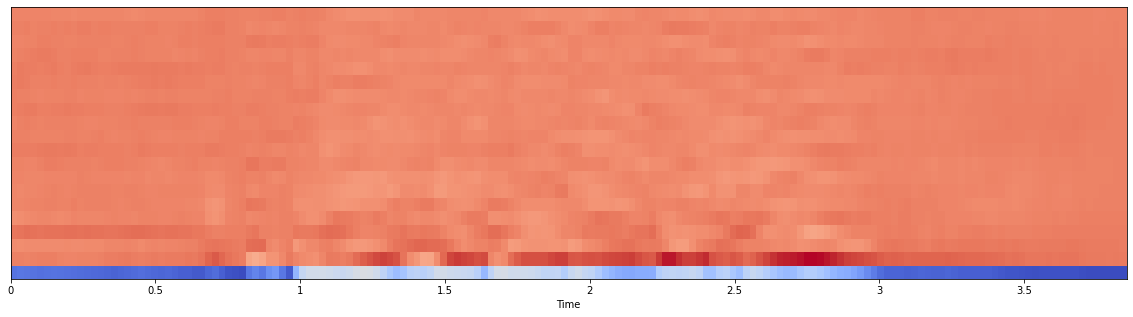

In [29]:
# MFCC

plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

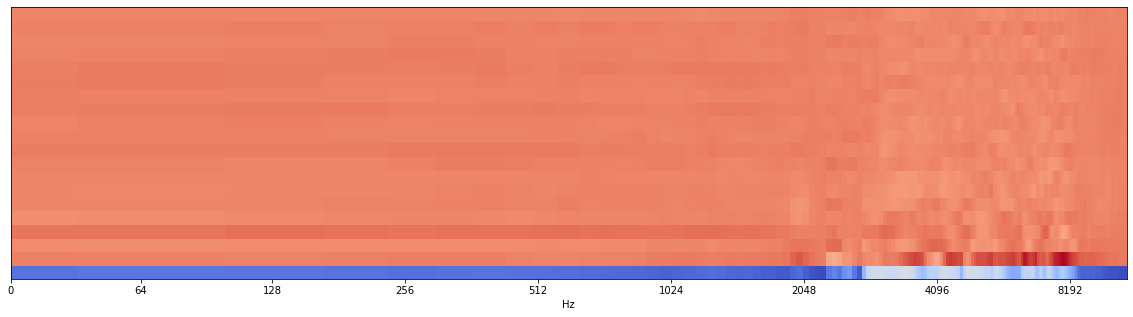

In [31]:
plt.figure(figsize=(20,5))
librosa.display.specshow(mfccs, sr=sr, x_axis='log')

## ***Feature Scaling***
*- Scaling the MFCCs such that each coefficient dimension has zero mean and unit variance.*

In [32]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-1.7235077e-08  2.2980103e-08 -5.7450258e-09  0.0000000e+00
 -1.1490052e-08 -2.2980103e-08  0.0000000e+00  1.4362565e-08
  1.1490052e-08 -5.7450258e-09  1.1490052e-08  5.7450258e-09
 -1.1490052e-08  5.7450258e-09  0.0000000e+00  8.6175387e-09
  0.0000000e+00  1.1490052e-08 -7.1812827e-09  1.0053795e-08]
[1.        1.        1.        1.        1.        0.9999999 0.9999999
 1.0000001 1.0000001 0.9999998 1.        1.0000001 1.        0.9999999
 1.        0.9999999 1.        1.        1.        1.       ]


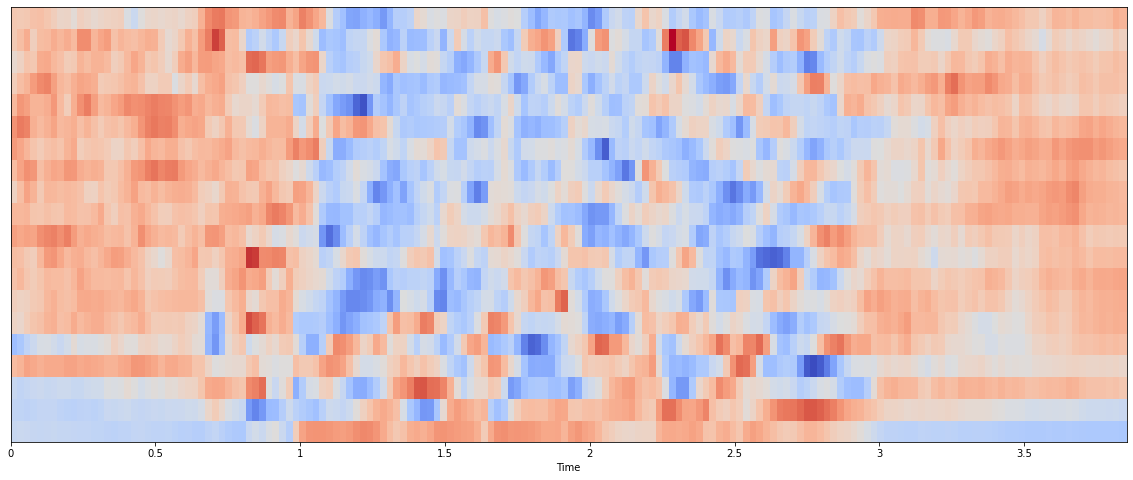

In [33]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

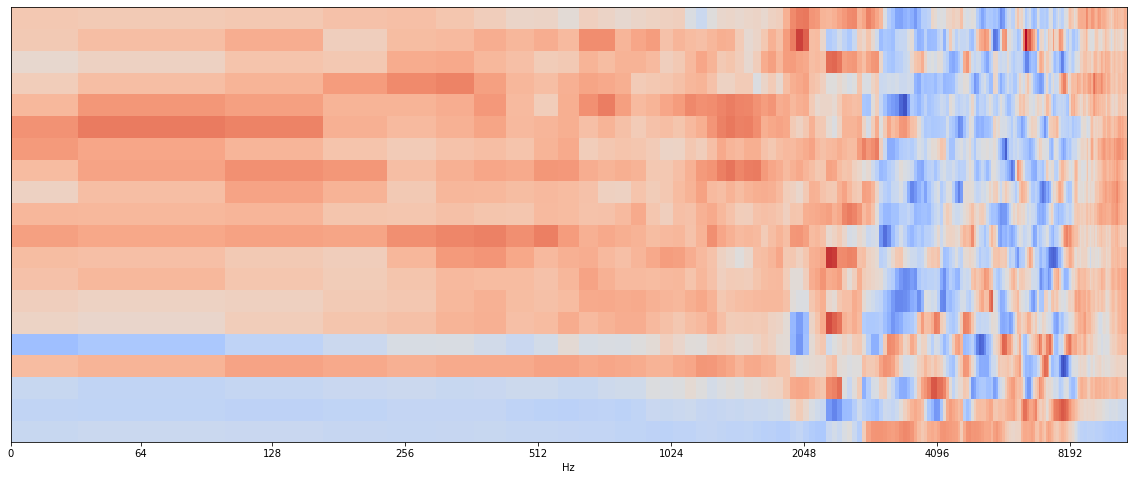

In [34]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='log')

## ***Chroma Frequencies***
*- Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.*

In [35]:
# Loading the file

x, sr = librosa.load(audio_path)
ipd.Audio(x, rate=sr)

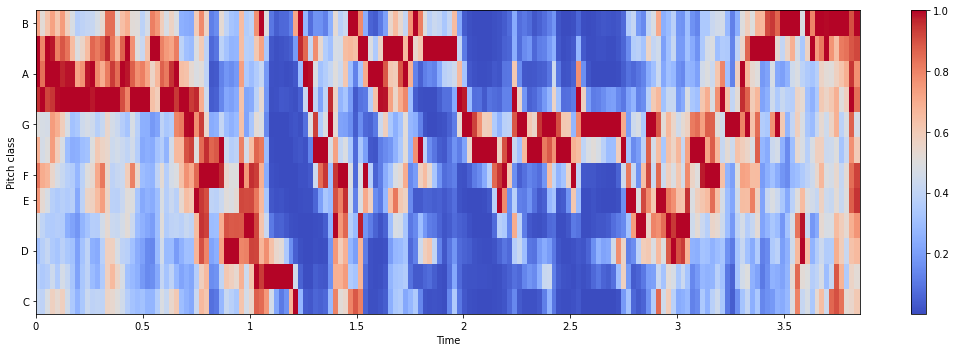

In [36]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()
plt.tight_layout()
plt.show()

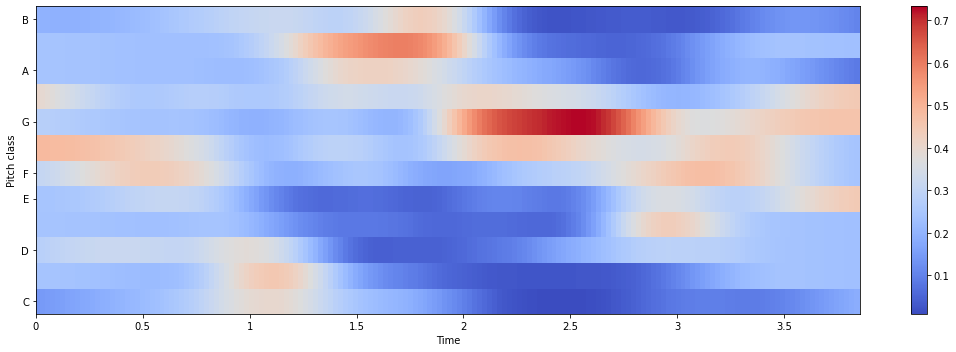

In [37]:
# Using chroma energy distribution normalized statistics (CENS),
# typically used to identify similarity between different interpretations of the music given.

hop_length = 512
chromagram = librosa.feature.chroma_cens(x, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()
plt.tight_layout()
plt.show()